# COGS 118B - Final Project

# Discovering Semantic Patterns In Word Difficulty Using Clustering

## Group members

- Anh Tran
- Eric Song
- Kendrick Nguyen

# Abstract 

This project seeks to find underlying patterns in English words that can contribute to its difficulty. We define word difficulty as the level of complexity in understanding a particular word. Although word difficulty is largely subjective and experience-dependent, we would like to examine whether certain semantic features in English words also carry independent and/or latent significance to difficulty. In fact, this project will build off from another study, the *Word Difficulty Prediction Using Covolutional Neural Networks study* (Basu, Garain, and Naskar, 2019)<a name="avishek"></a>[<sup>[1]</sup>](#avisheknote), that similarly aligns with our project.

Our project employs exploratory data analysis and machine learning algorithms to find critical semantic patterns contributing to word difficulty using the study's corpus dataset that also contains semantic features, such as `Length`, `Log_Freq_HAL`, and `I_Zscore`. In our case, we define `I_Zscore` as a metric of word difficulty (0 being easy to understand and 1 being hard to understand). This project attempts to find underlying patterns using various unsupervised learning clustering algorithms, yet our findings were unfortunately poor based on silhouette score metrics. However, since these silhouette score metrics were similarly and consistently low, we concluded that our project was limited by the relatively small corpus dataset and unaccounted external factors that could also contribute to word difficulty.

# Background

English is currently the most spoken language in the world at 1.456 billion speakers <a name="wiki"></a>[<sup>[2]</sup>](#wikinote). A large portion of these English speakers are those learning it as a second language <a name="wiki"></a>[<sup>[2]</sup>](#wikinote). Often times, people who are learning the language find it difficult and encounter many challenges such as the complexity of pronunciation and non-obvious rule sets (for instance, think of “read” and “read”<a name="adjective"></a>[<sup>[6]</sup>](#adjectivenote)). To gain a better understanding of how the language is learned by English second language learners, many delve into how difficult it is to learn a particular word of the English language. For example, the Flesch-Kincaid readability tests was created in order to see how difficult a passage in English is to grasp<a name="flesch"></a>[<sup>[3]</sup>](#fleschnote). The test was created based on the need to judge the U.S. Navy recruitment to see their reading comprehension level. The test uses total words, total sentences, total syllables, and total words to plug into an equation to churn out a score.

Another research group that looked to analyze English words was <a name="avishek"></a>[<sup>[1]</sup>](#avisheknote). Building on the English Lexicon Project, Basu et. al. looked to use traditional machine learning models as well as a convolutional neural network based prediction model to predict word difficulty. We will build on the foundations that this project and the English Lexicon Project laid out. In particular, we will be using their `I_Zscore` as a metric of word difficulty. The `I_Zscore` is the “standardized mean lexical decision latency for each word” <a name="lexicon"></a>[<sup>[7]</sup>](#lexiconnote)). The lexical decision latency is the time it takes to read a word and decide whether that word is in the English language or not <a name="lexical"></a>[<sup>[8]</sup>](#lexicalnote). Presumably, this is a way for us to decide how difficult a word is. Harder words may have higher lexical decision latency than easier words, as the English Lexicon Project goes to explore.

We will, in part, be using unsupervised machine learning techniques to try and discover underlying patterns between words that are classified as easy (closer to 0 on the `I_Zscore`) and words that are classified as hard (closer to 1 on the `I_Zscore`).

By discovering certain patterns among English words, such as similarities in its pronunciation or length, many English speakers and learners could leverage these patterns to learn new words that follow a similar convention. These patterns could alternatively provide English speakers and learners insights and expectations about word difficulty, which can facilitate people’s subjective opinions on how language is used and learned.

# Problem Statement

The scope of this project's problem statement is to determine what makes an English word difficult semantically and whether easy/difficult words share some underlying similarity that isn't immediately obvious using clustering. For difficult words, we define it as the `I_Zscore` obtained from the *Word Difficulty Prediction Using Covolutional Neural Networks* study<a name="avishek"></a>[<sup>[1]</sup>](#avisheknote). Our success can be measured in some of the following ways: finding clusters that correspond well with the `I_Zscore` and computing silhouette score to evaluate the clustering. To find underlying patterns, we will examine and compare the semantic features (ex. `Length`, `Log_Freq_HAL`, `I_Mean_Accuracy`, etc.) for each word within a cluster.

# Data

Our dataset of choice is a corpus dataset from the *Word Difficulty Prediction Using Covolutional Neural Networks study* (Basu, Garain, and Naskar, 2019)<a name="avishek"></a>[<sup>[1]</sup>](#avisheknote). The words were tokenized from the SUBTLEXUS corpus of 131 million words.

- The raw dataset is also published on from Kaggle: https://www.kaggle.com/datasets/kkhandekar/word-difficulty. 
- Number of observations: 9 variables, 40481 observations
- Description: An observation consists of the `Word`, `Length`, `Freq_HAL`, `Log_Freq_HAL`, `I_Mean_RT`, `I_Zscore`, `I_SD`, `Obs`, and `I_Mean_Accuracy`.
- Critical variables for our problem statement is `I_Zscore`, as it denotes the difficulty of a word. This value fluctuates between 0 and 1 for a word with 0 being SIMPLE and 1 being DIFFICULT.

In [1]:
#!pip install -r requirements.txt

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/WordDifficulty.csv')
df.head()

,Word,Length,Freq_HAL,Log_Freq_HAL,I_Mean_RT,I_Zscore,I_SD,Obs,I_Mean_Accuracy
0,a,1,10610626,16.18,798.92,-0.01,333.85,24.0,0.73
1,aah,3,222,5.40,816.43,0.21,186.03,21.0,0.62
2,Aaron,5,10806,9.29,736.06,-0.11,289.01,32.0,0.97
3,aback,5,387,5.96,796.27,0.11,171.61,15.0,0.45
4,abacus,6,513,6.24,964.40,0.65,489.00,15.0,0.47


**The following is a brief description of each feature:**

- `Length`: Number of characters

- `Freq_HAL`: Hyperspace Analogue to Language frequency norms based on the HAL corpus of 131 million words. Higher values may indicate more frequent words in a corpus.

- `Log_Freq_HAL`: Applied logarithmic transformation to `Freq_HAL`

- `I_Mean_RT`: Individual mean reaction time, associated with lexical decision time

- `I_Zscore`: Z-score of individual reaction times, associated with word difficulty

- `I_SD`: Standard deviation of individual reaction times

- `Obs`: Number of observations/individuals experimented with respective word

- `I_Mean_Accuracy`: Individual mean accuracy score, average accuracy score in tasks related to word difficulty

This dataset appears somewhat preprocessed prior to publishment where some features have a transformed or standardized version of themselves. From glance, we can perform feature selection by removing the `Freq_HAL`, `I_Mean_RT`, `I_SD`, and `Obs` columns as the dataset already offers the same feature but transformed. The crtical feature `I_Zscore` is a function of `I_Mean_RT` and `I_SD`, so including the the latter is redundant.

In [3]:
# Drop Freq_HAL and Obs columns
df = df.drop(['Freq_HAL', 'I_Mean_RT', 'I_SD', 'Obs'], axis=1)
df = df.dropna().reset_index(drop=True)

# Apply lower to words
df['Word'] = df['Word'].str.lower()

In [4]:
import re

# Use regex to remove any quotes, astericks, and other punctuations
pattern = r"[\"*!?.,']"

for index, word in enumerate(df['Word']):
    cleaned_word = re.sub(pattern, '', word)
    df.loc[index, 'Word'] = cleaned_word
    
# Remove duplicates
df.drop_duplicates('Word', inplace=True)

**This dataset can be strengthened by extracting more features, such as:**

- Vowel Count, also correlated to syllables
- Entropy, or the measure of the unpredictability of the word's character. Computed from $H(x)=\Sigma{p(x)\log{p(x)}}$
- Parts of speech category. Tagged based on the [Penn Treebank Project](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html).
- Sentiment score

In [5]:
# Count vowels
vowels = ['a', 'e', 'i', 'o', 'u']
num_vowels = []
for word in df['Word']:
    vowel_count = sum(word.count(vowel) for vowel in vowels)
    num_vowels.append(vowel_count)
    
df['Vowels'] = num_vowels

In [6]:
from collections import Counter
import math

# Word entropy
def calculate_entropy(word):
    # Frequency of each character
    char_counts = Counter(word)

    # Calculate the probability of each character
    total_chars = len(word)
    char_probabilities = {char: count / total_chars for char, count in char_counts.items()}

    # Calculate the entropy
    entropy = -sum(prob * math.log2(prob) for prob in char_probabilities.values())

    return entropy

entropy_values = [calculate_entropy(word) for word in df['Word']]
df['Entropy'] = entropy_values

In [7]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download(['vader_lexicon', 'averaged_perceptron_tagger'])

# Getting parts of speech
word_tags = nltk.pos_tag(df['Word'])
word_tags = [word_tag[1] for word_tag in word_tags]

df['PoS'] = word_tags

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kendrick/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/kendrick/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [8]:
# Getting sentiment score, we look at the compound score for a final vote
sia = SentimentIntensityAnalyzer()
sentiment_scores = [sia.polarity_scores(word)['compound'] for word in df['Word']]

df['SentimentScore'] = sentiment_scores

In [9]:
# Save preprocessed dataset
df.to_csv('./data/NewWordDifficulty.csv', index=False)
df.set_index('Word', inplace=True)
df.head()

,Length,Log_Freq_HAL,I_Zscore,I_Mean_Accuracy,Vowels,Entropy,PoS,SentimentScore
Word,,,,,,,,
a,1,16.18,-0.01,0.73,1,-0.000000,DT,0.0
aah,3,5.40,0.21,0.62,2,0.918296,JJ,0.0
aaron,5,9.29,-0.11,0.97,3,1.921928,NN,0.0
aback,5,5.96,0.11,0.45,2,1.921928,NN,0.0
abacus,6,6.24,0.65,0.47,3,2.251629,NN,0.0


# Proposed Solution

In this section, clearly describe a solution to the problem. The solution should be applicable to the project domain and appropriate for the dataset(s) or input(s) given. Provide enough detail (e.g., algorithmic description and/or theoretical properties) to convince us that your solution is applicable. Make sure to describe how the solution will be tested.  

If you know details already, describe how (e.g., library used, function calls) you plan to implement the solution in a way that is reproducible.

If it is appropriate to the problem statement, describe a benchmark model<a name="sota"></a>[<sup>[3]</sup>](#sotanote) against which your solution will be compared. 

# Evaluation Metrics

The goal of this project is not predicting word difficulty but rather clustering words based on semantic features and exploring any underlying relationships based on the `I_ZScore` feature. The metric used to evaluate the performance of our clustering algorithms is a Silhouette Scores, which quantifies the density and separation of clusters. This metric is bounded by the range from -1 to 1, and ideally a higher positive score is desired.

Meanwhile, "0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar."<a name="sklearn"></a>[<sup>[4]</sup>](#sklearnnote).

Silhouette Scores can be mathematically represented where,<a name="fleischer"></a>[<sup>[5]</sup>](#fleischernote)

$a$: The mean distance between a sample and all other points in the same class

$b$: The mean distance between a sample and all other points in the next nearest cluster

$$score = \frac{b-a}{max(a,b)}$$

For the exploratory data analysis aspect, we would like to visualize how certain features relate with difficulty; thus, visual inspection of 2D plots will be another form evaluation. Regression algorithms will also be used to find correlations among all features against `I_ZScore` in a One Vs. One manner. Therefore, to find correlation strengths between patterns and `I_ZScore`s, we use $R^2$ proportion of variance explained by the model to evaluate performance. This value ranges from 0 to 1, and a higher value is desired for a better fit. Briefly, this is mathematically represented as

$$R^2 = 1 - \frac{\Sigma(y-\hat{y})^2}{\Sigma(y-\bar{y})^2}$$

# Results

## Part I: Exploratory Data Analysis Using Regression

We will be using linear regression to obtain the $R^2$ proportion of variance in One Vs. One manner. Specifically, we will regress all features against the `I_ZScore` and drop one feature at a time to see the affects of $R^2$. Drastic changes from removing a specific feature, say by 10% based on the 10% Rule for Confounding, will be regarded as a critical feature for word difficulty.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = df.drop('PoS', axis=1)

In [12]:
from sklearn.linear_model import LinearRegression

# Linear regression
regression_df = df.drop('I_Zscore', axis=1)

regression = LinearRegression()
regression.fit(regression_df, df['I_Zscore'])

benchmark_r = regression.score(regression_df, df['I_Zscore'])
print(f"Benchmark R^2 value: {benchmark_r}")

Benchmark R^2 value: 0.7260568325089171


In [13]:
# Print magnitude correlation coefficients
for feature, coef in zip(regression_df.columns, regression.coef_):
    print(f'{feature}: {abs(coef)}')

Length: 0.086828254206973
Log_Freq_HAL: 0.05204616302389834
I_Mean_Accuracy: 1.0840808162625748
Vowels: 0.042399142875649345
Entropy: 0.12633635262560305
SentimentScore: 0.04606578369071129


In [14]:
# Find critical features
for dropped_feature in regression_df.columns:
    temp_df = regression_df.drop(dropped_feature, axis=1)
    
    conf_regression = LinearRegression()
    conf_regression.fit(temp_df, df['I_Zscore'])
    new_r = conf_regression.score(temp_df, df['I_Zscore'])
    
    if not(benchmark_r * 0.9 < new_r < benchmark_r * 1.1):
        print(dropped_feature)

I_Mean_Accuracy


It appears that `I_Mean_Accuracy` is a critical feature correlated to word difficulty or `I_ZScore`. This is expected because its correlation coefficient is relatively larger compared to the others. Alternatively, we can prove this with `sklearn`'s methods for feature selection/permutation,

In [15]:
# Permutation importanace with sklearn
from sklearn.inspection import permutation_importance

permutation_scores = permutation_importance(regression, regression_df, df['I_Zscore'], n_repeats=10)
importance_scores = permutation_scores.importances_mean

# Print feature importance scores
for feature, score in zip(regression_df.columns, importance_scores):
    print(f'{feature}: {abs(score)}')

Length: 0.4268866239142367
Log_Freq_HAL: 0.14529149880964268
I_Mean_Accuracy: 0.43500860929133217
Vowels: 0.026003091697998935
Entropy: 0.024775719727360555
SentimentScore: 0.00029109968491292104


Suprisingly, with this method `Length` is considered a critical feature.

## Part II: Exploratory Data Analysis Using Dimensionality Reduction

In [16]:
from sklearn.preprocessing import StandardScaler

# Standardize df
scale = StandardScaler()
scaled_data = scale.fit_transform(df)

scaled_df = pd.DataFrame(data=scaled_data, columns=df.columns)
scaled_df.head()

,Length,Log_Freq_HAL,I_Zscore,I_Mean_Accuracy,Vowels,Entropy,SentimentScore
0,-2.843229,4.173232,-0.031356,-0.558108,-1.607940,-6.390463,0.036461
1,-2.030579,-0.323578,0.443770,-1.110229,-0.803215,-4.141236,0.036461
2,-1.217929,1.299111,-0.247323,0.646520,0.001509,-1.682991,0.036461
3,-1.217929,-0.089977,0.227804,-1.963508,-0.803215,-1.682991,0.036461
4,-0.811604,0.026823,1.394024,-1.863122,0.001509,-0.875438,0.036461


In [17]:
# ...

## Part III: K-Means Clustering

This will be the first clustering algorithm employed. The goal is to experiment whether K-Means clustering is an appropriate algorithm to cluster for words and to find any underlying relationships within a cluster if possible. We will not be using a reduced dataset from the previous Dimensionality Reduction section, as predicting with ~7 columns is more than sufficient.

Based on the previous plots, the dataset appears extremely dense, even when visualized in 2D. Therefore, will be using model selection off the bat to find the optimal `n_clusters` parameter.

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters = [2, 3, 6, 9, 12, 15, 18, 21, 24]

silhouette_scores = []
inertia = []
for n in n_clusters:
    knn = KMeans(n_clusters=n)
    labels = knn.fit_predict(df)
    
    inertia.append(knn.inertia_)
    silhouette_scores.append(silhouette_score(df, labels))

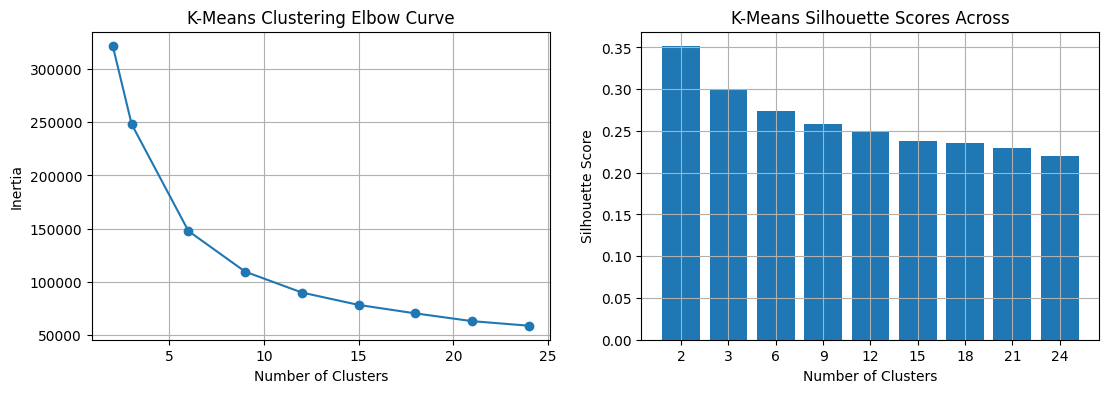

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(13, 4))

axes[0].plot(n_clusters, inertia, marker='o')
axes[0].set_title('K-Means Clustering Elbow Curve')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

cluster_str = [str(n) for n in n_clusters]
axes[1].bar(cluster_str, silhouette_scores)
axes[1].set_title('K-Means Silhouette Scores Across')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

plt.show()

From our quick model selection and elbow curve, we will approximate to 6 clusters or at the inflection point of the elbow curve. However, we will also consider 2 clusters as a candidate since it yieleded the highest silhouette score.

In [20]:
# For 2 clusters
knn = KMeans(n_clusters=2)
knn_labels_2_clusters = knn.fit_predict(df)

# For 6 clusters
knn = KMeans(n_clusters=6)
knn_labels_6_clusters = knn.fit_predict(df)

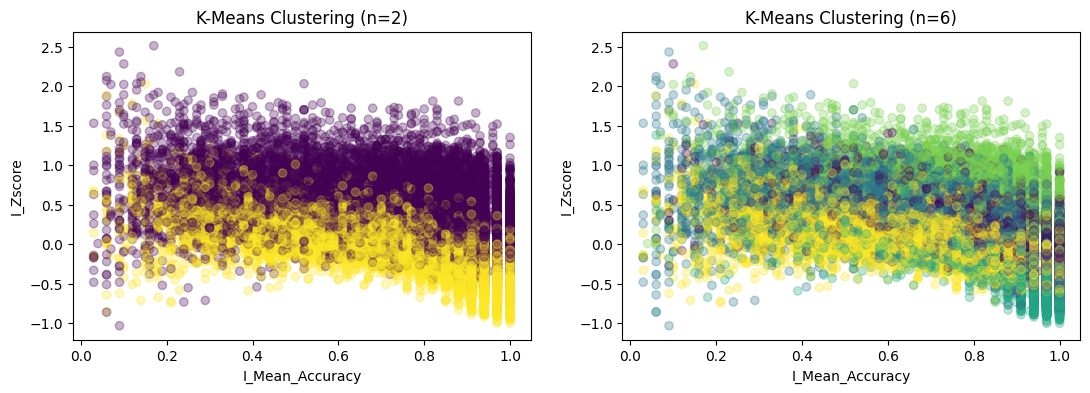

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(13, 4))

axes[0].scatter(df['I_Mean_Accuracy'], df['I_Zscore'], cmap='viridis', c=knn_labels_2_clusters, alpha=0.3)
axes[0].set_title('K-Means Clustering (n=2)')
axes[0].set_xlabel('I_Mean_Accuracy')
axes[0].set_ylabel('I_Zscore')

axes[1].scatter(df['I_Mean_Accuracy'], df['I_Zscore'], cmap='viridis', c=knn_labels_6_clusters, alpha=0.3)
axes[1].set_title('K-Means Clustering (n=6)')
axes[1].set_xlabel('I_Mean_Accuracy')
axes[1].set_ylabel('I_Zscore')

plt.show()

The plot above represents the K-Means clustering for 2 and 6 clusters respectively. They are visualized in 2D using the `I_Mean_Accuracy` and `I_Zscore` as they the critical features for this dataset. Based on these scatterplots, K-Means may not be the most appropriate model for clustering this dataset. If we observe K-Means with 2 clusters, which appears as the most "separable", the distribution of each cluster appears like a tied gaussian.

If we also search for underlying pattern among features, the aggregated mean standard deviation of each feature within a cluster have an overlapping ballpark. 

In [22]:
def std(x): return np.std(x)

kmeans_df = df
kmeans_df['Labels'] = knn_labels_2_clusters
kmeans_grouped = kmeans_df.groupby('Labels').agg(['mean', std])

kmeans_grouped

Length           Log_Freq_HAL            I_Zscore            \
            mean       std         mean       std      mean       std   
Labels                                                                  
0       9.894684  1.874511     4.761427  2.066850  0.287053  0.429710   
1       6.306026  1.501426     7.436516  1.920666 -0.247358  0.326063   

       I_Mean_Accuracy              Vowels             Entropy            \
                  mean       std      mean       std      mean       std   
Labels                                                                     
0             0.803729  0.215170  3.822793  1.100098  2.860206  0.282175   
1             0.874592  0.177308  2.262936  0.833770  2.385138  0.371390   

       SentimentScore            
                 mean       std  
Labels                           
0           -0.003486  0.112276  
1           -0.005341  0.130945

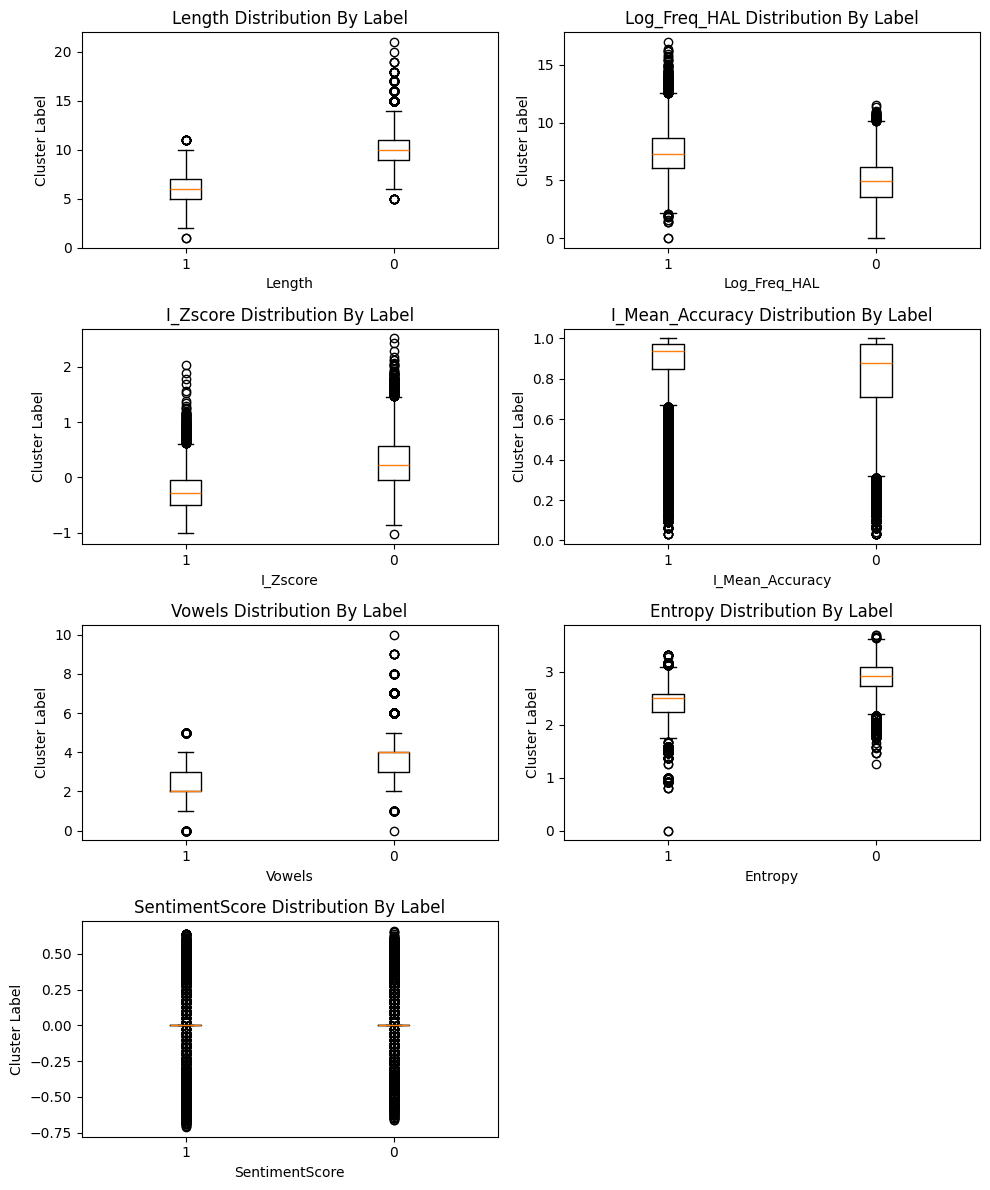

In [23]:
fig, axes = plt.subplots(4, 2, figsize=(10, 12))
axes = axes.flatten()

# Loop through each feature and create multi-boxplots
for idx, column in enumerate(kmeans_df.drop(columns='Labels').columns):
    label_dict = {}
    
    for label in kmeans_df['Labels'].unique():
        # Filter the DataFrame for rows with the current label
        filtered_data = kmeans_df[kmeans_df['Labels'] == label][column].tolist()

        # Assign the filtered data to the dictionary with the label as the key
        label_dict[label] = filtered_data
        

    axes[idx].boxplot(label_dict.values())
    axes[idx].set_xticklabels(label_dict.keys())
    axes[idx].set_title(f'{column} Distribution By Label')
    axes[idx].set_xlabel(f'{column}')
    axes[idx].set_ylabel('Cluster Label')
    
axes[7].remove()
plt.tight_layout()
plt.show()

Based on the multi-boxplots for each feature, we observe no large marginal seperation for each label within a cluster using K-Means. This would suggest that the corpus dataset is inherently dense and requires a "soft" solution. 

## Part IV: Gaussian Mixture Model

Our next clustering algorithm will be a Gaussian Mixture Model. We will transfer over our best `n_clusters=2` parameter from K-Means. Based on previous 2D plot, we can approximate a tied covariance matrix to fit our Gaussian Mixture Model.

In [24]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, covariance_type='tied')
gmm_labels = gmm.fit_predict(df)

In [25]:
print(f'Silhouette Score: {silhouette_score(df, labels)}')

Silhouette Score: 0.22092605741153973


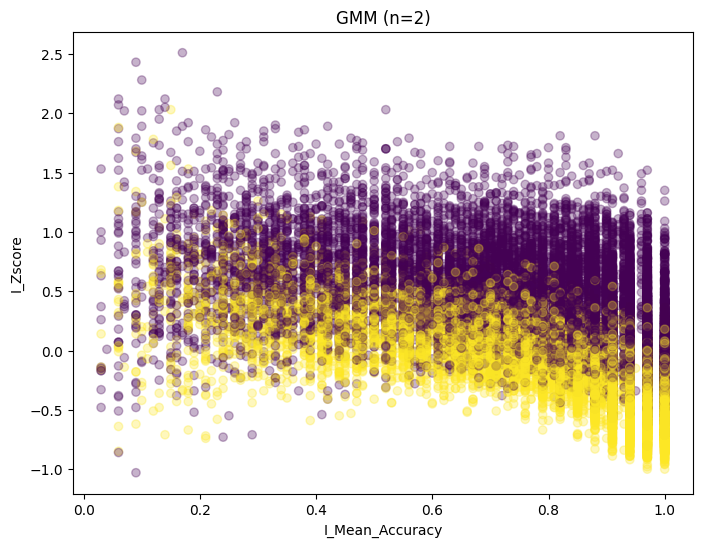

In [26]:
plt.figure(figsize=(8, 6))

plt.scatter(df['I_Mean_Accuracy'], df['I_Zscore'], cmap='viridis', c=gmm_labels, alpha=0.3)
plt.title('GMM (n=2)')
plt.xlabel('I_Mean_Accuracy')
plt.ylabel('I_Zscore')

plt.show()

In [27]:
gmm_df = df
gmm_df['Labels'] = gmm_labels
gmm_grouped = gmm_df.groupby('Labels').agg(['mean', std])

gmm_grouped

Length           Log_Freq_HAL            I_Zscore            \
            mean       std         mean       std      mean       std   
Labels                                                                  
0       9.894684  1.874511     4.761427  2.066850  0.287053  0.429710   
1       6.306026  1.501426     7.436516  1.920666 -0.247358  0.326063   

       I_Mean_Accuracy              Vowels             Entropy            \
                  mean       std      mean       std      mean       std   
Labels                                                                     
0             0.803729  0.215170  3.822793  1.100098  2.860206  0.282175   
1             0.874592  0.177308  2.262936  0.833770  2.385138  0.371390   

       SentimentScore            
                 mean       std  
Labels                           
0           -0.003486  0.112276  
1           -0.005341  0.130945

The Gaussian Mixture Model did not seem to seperate any better. Interestingly, the clustering is very similar to K-Means as the mean and standard deviation within each cluster for each cluster are approximately equal.

## Part V: Model Selection

This section will be dedicated to comparing other clustering algorithms. We wont dive into the implementation, as they take long to train. Our rough implementations can mostly be found the `/scratch` directory. The following clustering algorithms we experimented with:

- Spectral Clustering
- Heirarchial Clustering

At this point, it is expected that the majority of unsuperivsed clustering algorithms will perform poorly against the dense corpus dataset. However, if the majority of clustering algorithms are performing consistently poor, it could suggest an underlying pattern that generally all words are dense in a vector space.

Again we will cluster for `n_clusters=2`, as it yielded the best results from the K-Means and Gaussian Mixture Model.

In [28]:
# Spectral clustering, used to 10 nearest neighbors to construct affinity matrix
# We will import the projected eigenvectors obtained from the affinity matrix computed prior

proj_df = pd.read_csv('./outputs/proj_df.csv')
spectral_labels = KMeans(n_clusters=2).fit_predict(proj_df)
print(f'Silhouette Score: {silhouette_score(df, spectral_labels)}')

Silhouette Score: 0.23896702669286038


In [29]:
# Heirarchial clustering, using complete linkage tree distance
import pickle
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

with open('./outputs/tree_cplt.p', 'rb') as model:
    tree_cplt = pickle.load(model)
    
# Cut to make 2 clusters
heirarchial_labels = fcluster(tree_cplt, criterion='distance', t=25)
print(f'Silhouette Score: {silhouette_score(df, heirarchial_labels)}')

Silhouette Score: 0.3391758865040802


![heirarchial_clustering](./outputs/heirarchial_clusterings.png)

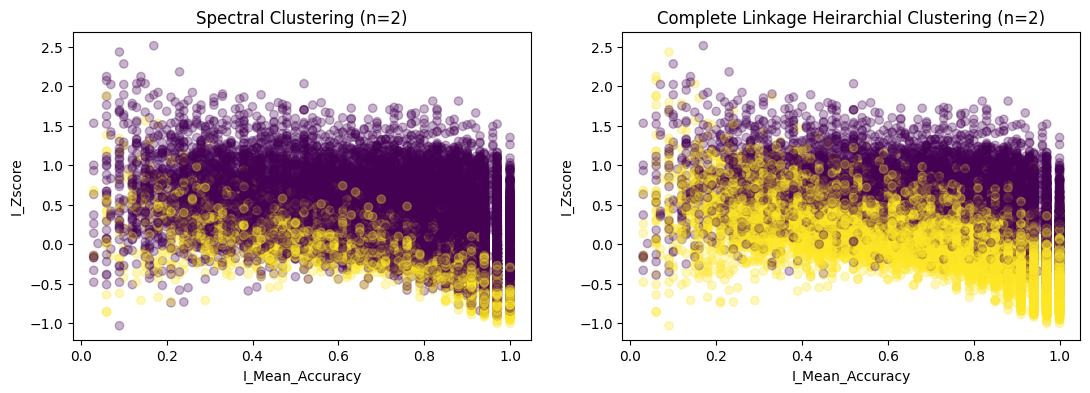

In [96]:
fig, axes = plt.subplots(1, 2, figsize=(13, 4))

axes[0].scatter(df['I_Mean_Accuracy'], df['I_Zscore'], cmap='viridis', c=spectral_labels, alpha=0.3)
axes[0].set_title('Spectral Clustering (n=2)')
axes[0].set_xlabel('I_Mean_Accuracy')
axes[0].set_ylabel('I_Zscore')

axes[1].scatter(df['I_Mean_Accuracy'], df['I_Zscore'], cmap='viridis', c=heirarchial_labels, alpha=0.3)
axes[1].set_title('Complete Linkage Heirarchial Clustering (n=2)')
axes[1].set_xlabel('I_Mean_Accuracy')
axes[1].set_ylabel('I_Zscore')

plt.show()

In [31]:
heirarchial_df = df
heirarchial_df['Labels'] = heirarchial_labels
heirarchial_grouped = heirarchial_df.groupby('Labels').agg(['mean', std])

heirarchial_grouped

Length           Log_Freq_HAL            I_Zscore            \
             mean       std         mean       std      mean       std   
Labels                                                                   
1       10.564391  1.804206     4.532570  2.036982  0.380583  0.426862   
2        6.790522  1.679150     6.948243  2.152144 -0.172294  0.363015   

       I_Mean_Accuracy              Vowels            Entropy            \
                  mean       std      mean       std     mean       std   
Labels                                                                    
1             0.802043  0.210732  4.189460  1.028788  2.91814  0.272277   
2             0.859600  0.190833  2.437999  0.889706  2.46372  0.379686   

       SentimentScore            
                 mean       std  
Labels                           
1           -0.002916  0.109738  
2           -0.005196  0.128062

Based on the silhouette scores, the complete linkage heirarchial clustering method is relatively the best clustering we can obtain for this data. However, after testing various clustering algorithms, it does fortify that this words are too dense. It could suggest that we are missing some external latent factor, not accounted for our clusterings.

Let us also compare the similarity between all clustering algorithms using Random Index Scores and Kullback-Leibler Divergence metrics.

In [34]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from itertools import combinations

# Spectral labels are flipped...
spectral_labels = [0 if label else 1 for label in spectral_labels]

all_labels = {'K-Means': knn_labels_2_clusters, 
              'Gaussian Mixture Model': gmm_labels, 
              'Spectral Clustering': spectral_labels, 
              'Heirarchial Clustering': heirarchial_labels}

model_combinations = list(combinations(all_labels.keys(), 2))

for pairing in model_combinations:
    model1, model2 = pairing
    
    print(f'{model1} vs. {model2}')
    print(f'Adjusted Random Index Score: {adjusted_rand_score(all_labels[model1], all_labels[model2])}')
    print(f'Adjusted Kullback-Leibler Divergence: {adjusted_mutual_info_score(all_labels[model1], all_labels[model2])}')
    print('')

K-Means vs. Gaussian Mixture Model
Adjusted Random Index Score: 1.0
Adjusted Kullback-Leibler Divergence: 1.0

K-Means vs. Spectral Clustering
Adjusted Random Index Score: 0.0956880482137665
Adjusted Kullback-Leibler Divergence: 0.21920268011325195

K-Means vs. Heirarchial Clustering
Adjusted Random Index Score: 0.4845661060794057
Adjusted Kullback-Leibler Divergence: 0.49920890021870673

Gaussian Mixture Model vs. Spectral Clustering
Adjusted Random Index Score: 0.0956880482137665
Adjusted Kullback-Leibler Divergence: 0.21920268011325195

Gaussian Mixture Model vs. Heirarchial Clustering
Adjusted Random Index Score: 0.4845661060794057
Adjusted Kullback-Leibler Divergence: 0.49920890021870673

Spectral Clustering vs. Heirarchial Clustering
Adjusted Random Index Score: -0.05315302467938533
Adjusted Kullback-Leibler Divergence: 0.14809809677100422



There is noticeably more similarity in Random Index and Kullback-Leibler Divergence scores for convex-based clustering algorithms. This could suggest that words are convex in a vector space perhaps.

## Part VI: Word Embedding-Based Clustering

One barrier for obtianing better clusterings is the dataset density. A potential solution could be utilizing a word's embedding to cluster instead. For this section, we will be using a pre-trained `word2vec` model from a Google News corpus (3 billion running words). Each word will be converted into a 300-dimension vector.

In [38]:
# The word2vec-google-news-300 model is ~10GB
import gensim.downloader as api
from gensim.models import KeyedVectors

DOWNLOAD = False
path = '/Users/kendrick/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz'

if DOWNLOAD:
    path = api.load('word2vec-google-news-300', return_path=True)

In [65]:
# Prepare model and get valid words supported by model
word2vec_model = KeyedVectors.load_word2vec_format(path, binary=True)

words = [[i] for i in df.index]
filtered_words = [word for word in words if word[0] in word2vec_model]

In [66]:
# Vectorize
word_vectors = {}
for word in filtered_words:
    vector = word2vec_model[word]
    word_vectors.update({word[0]: vector})

In [69]:
# Add another dimension for I_ZScore. Also normalize vectors prior to clustering
for word in word_vectors:
    difficulty = df.loc[word]['I_Zscore']
    difficulty = np.array([[difficulty]])
    
    new_vector = np.hstack((word_vectors[word], difficulty))
    word_vectors[word] = new_vector

# Normalize
normalized_vectors = np.array(list(word_vectors.values()))[:,0,:]
normalized_vectors = (normalized_vectors - normalized_vectors.mean(axis=0)) / normalized_vectors.std(axis=0)

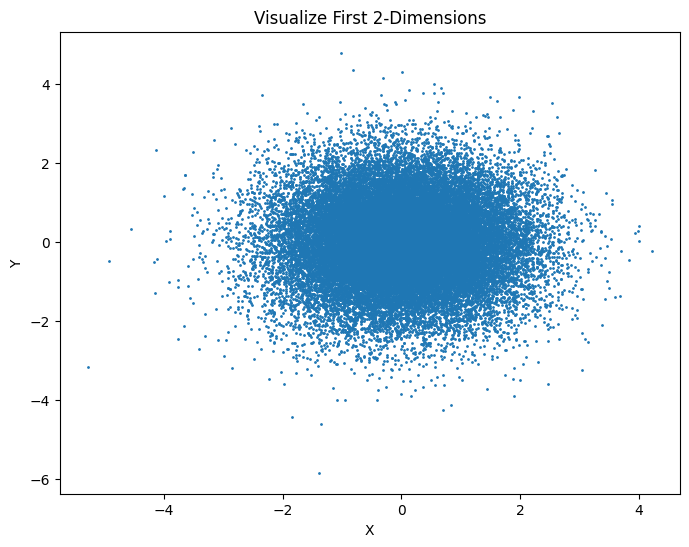

In [94]:
# Visualize first 2-dimensions
plt.figure(figsize=(8, 6))

plt.scatter(normalized_vectors[:, 0], normalized_vectors[:, 1], marker='.', s=1)
plt.title('Visualize First 2-Dimensions')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

In [80]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2)
embedded_labels = kmeans.fit_predict(normalized_vectors)

print(f'Silhouette Score: {silhouette_score(normalized_vectors, embedded_labels)}')

Silhouette Score: 0.025295330431428616


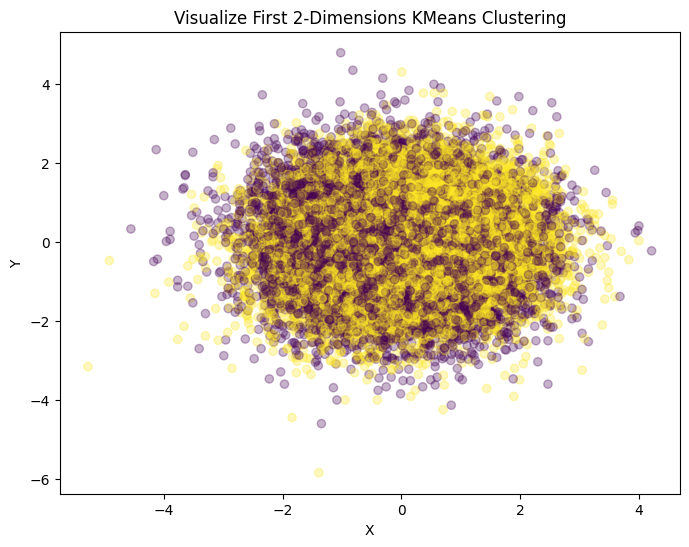

In [99]:
# Visualize vectorized KMeans
plt.figure(figsize=(8, 6))

plt.scatter(normalized_vectors[:, 0], normalized_vectors[:, 1], cmap='viridis', c=embedded_labels, alpha=0.3)
plt.title('Visualize First 2-Dimensions KMeans Clustering')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

In [92]:
# Apply a threshold difficulty label for each I_ZScore (say at the median)
threshold = df['I_Zscore'].median()

threshold_labels = (df.loc[df.index.isin(word_vectors.keys())]['I_Zscore'] > threshold)
threshold_labels = list(threshold_labels.astype(int))

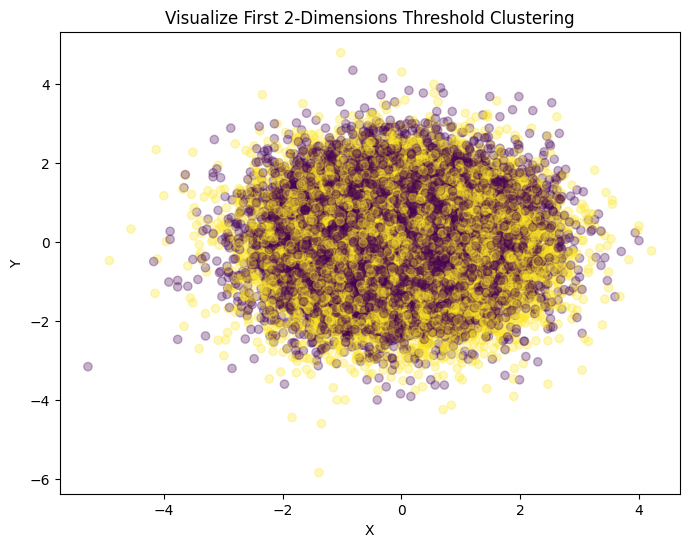

In [98]:
# Visualize thresholding
plt.figure(figsize=(8, 6))

plt.scatter(normalized_vectors[:, 0], normalized_vectors[:, 1], cmap='viridis', c=threshold_labels, alpha=0.3)
plt.title('Visualize First 2-Dimensions Threshold Clustering')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.

### Limitations

Are there any problems with the work?  For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for?   

### Ethics & Privacy

If your project has obvious potential concerns with ethics or data privacy discuss that here.  Almost every ML project put into production can have ethical implications if you use your imagination. Use your imagination.

Even if you can't come up with an obvious ethical concern that should be addressed, you should know that a large number of ML projects that go into producation have unintended consequences and ethical problems once in production. How will your team address these issues?

Consider a tool to help you address the potential issues such as https://deon.drivendata.org

### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

# Footnotes
<a name="lorenznote"></a>1.[^](#lorenz): Lorenz, T. (9 Dec 2021) Birds Aren’t Real, or Are They? Inside a Gen Z Conspiracy Theory. *The New York Times*. https://www.nytimes.com/2021/12/09/technology/birds-arent-real-gen-z-misinformation.html<br> 
<a name="admonishnote"></a>2.[^](#admonish): Also refs should be important to the background, not some randomly chosen vaguely related stuff. Include a web link if possible in refs as above.<br>
<a name="sotanote"></a>3.[^](#sota): Perhaps the current state of the art solution such as you see on [Papers with code](https://paperswithcode.com/sota). Or maybe not SOTA, but rather a standard textbook/Kaggle solution to this kind of problem
